# Simulation and Modeling
***Fall 2023***

Name:Abass Koroma



# Logistic Map and Chaos Theory
## Introduction
The logistic map is a mathematical function used to model population growth, but it also serves as a simplified model for understanding chaotic behavior in systems. In this notebook, you'll learn how varying the parameter
`r` in the logistic map can lead from predictable outcomes to chaotic behavior.



In [ ]:

import numpy as np
import matplotlib.pyplot as plt

### Part 1: The Logistic Function
The logistic function is defined as:
$$
x_{n+1} = r \times x_n \times (1 - x_n)
$$


Where,
$ x_{n+1}$:  is the population at the next time step. It's what we're trying to calculate.
   
$ x_n $  is the current population. For the initial time step, this is often set to a small number close to zero.

$ r $ is a parameter that controls how 'fast' the population grows or shrinks. Different values of \( r \) will produce different behaviors in the logistic map.





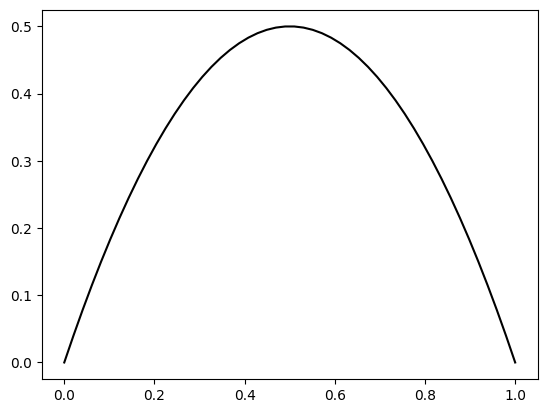

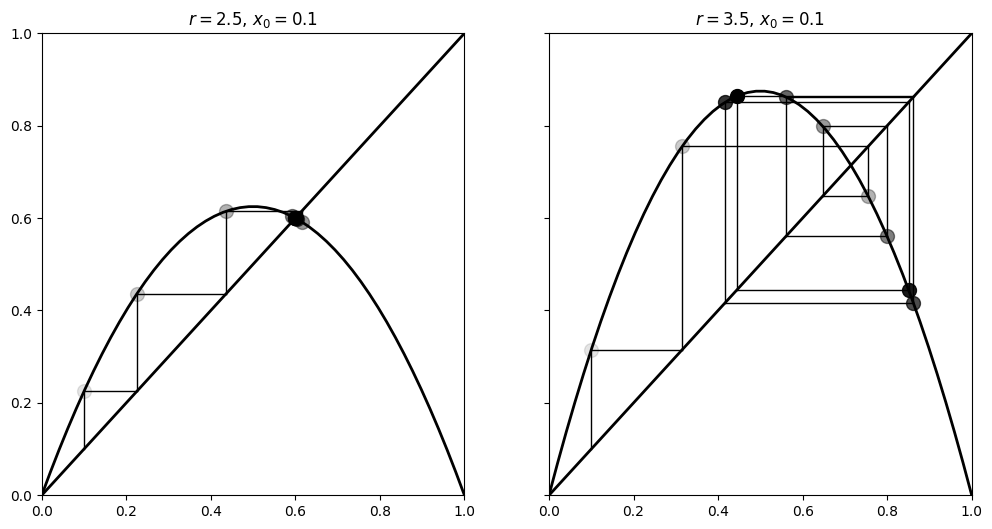

In [ ]:
def logistic(r, x):
    return r * x * (1 - x)

x = np.linspace(0, 1)
fig, ax = plt.subplots(1, 1)
ax.plot(x, logistic(2, x), 'k')


def plot_system(r, x0, n, ax=None):
    # Plot the function and the
    # y=x diagonal line.
    t = np.linspace(0, 1)
    ax.plot(t, logistic(r, t), 'k', lw=2)
    ax.plot([0, 1], [0, 1], 'k', lw=2)

    # Recursively apply y=f(x) and plot two lines:
    # (x, x) -> (x, y)
    # (x, y) -> (y, y)
    x = x0
    for i in range(n):
        y = logistic(r, x)
        # Plot the two lines.
        ax.plot([x, x], [x, y], 'k', lw=1)
        ax.plot([x, y], [y, y], 'k', lw=1)
        # Plot the positions with increasing
        # opacity.
        ax.plot([x], [y], 'ok', ms=10,
                alpha=(i + 1) / n)
        x = y

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f"$r={r:.1f}, \, x_0={x0:.1f}$")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),
                               sharey=True)
plot_system(2.5, .1, 10, ax=ax1)
plot_system(3.5, .1, 10, ax=ax2)

## Part 2: Visualizing Iterations of the Logistic Map

Let's explore the logistic map for a set of selected values of \( r \). The following Python code will plot the sequence of values generated by the logistic map equation over a number of iterations.

### What to Observe:

1. **Stable Points**: Some values of \( r \) will show the system converging to a fixed point.
  
2. **Oscillations**: Other values may lead to oscillations between a set of values.
  
3. **Chaos**: For some \( r \) values, the system will appear to behave chaotically, not settling down to any specific value or set of values.



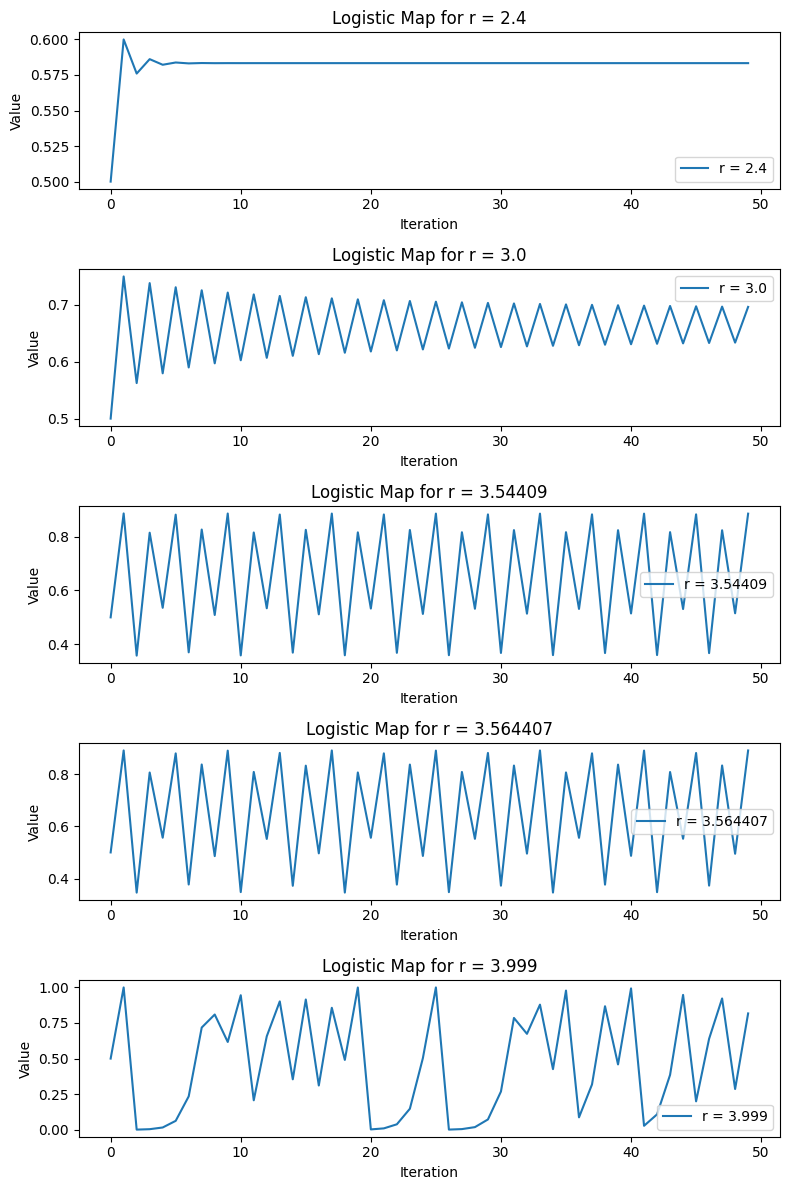

In [ ]:
def logistic_map(r, x0, num_iterations):
    # Initialize an array to store the sequence of values
    x = np.zeros(num_iterations)
    x[0] = x0

    # Iterate through the logistic map equation to generate values
    for i in range(1, num_iterations):
        x[i] = r * x[i - 1] * (1 - x[i - 1])
    return x

# Parameters
r_values = [2.4, 3.0, 3.54409, 3.564407, 3.999]
x0 = 0.5
num_iterations = 50

# Create subplots for each value of r
fig, axes = plt.subplots(len(r_values), 1, figsize=(8, 12))

# Generate and plot logistic map for each parameter value
for i, r in enumerate(r_values):
    x = logistic_map(r, x0, num_iterations)

    # Plot the generated sequence of values
    axes[i].plot(x, label=f'r = {r}')
    axes[i].set_xlabel('Iteration')
    axes[i].set_ylabel('Value')
    axes[i].set_title(f'Logistic Map for r = {r}')
    axes[i].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

## Part 3: Bifurcation Plot

The bifurcation plot provides a graphical representation of how the logistic map evolves for different values of \( r \). This plot displays a range of long-term behaviors of the system, such as fixed points and chaotic regions, as \( r \) varies.

### What is a Bifurcation Plot?

A bifurcation plot visualizes the stable values (attractors) that a system settles into after a long period. For each value of \( r \), you'll notice that the system might settle into a single value, oscillate between a set of values, or behave in a chaotic manner. This reveals the sensitive dependence on initial conditions and parameters, a hallmark of complex systems.

### How to Interpret the Bifurcation Plot

1. **Fixed Points**: When the plot shows a single horizontal line for a given \( r \), it means the system settles into a stable state.

2. **Period Doubling**: Multiple horizontal lines at a single \( r \) indicate that the system oscillates between multiple states.

3. **Chaos**: A densely populated region shows that the system is chaotic and does not settle into any fixed point or cycle.


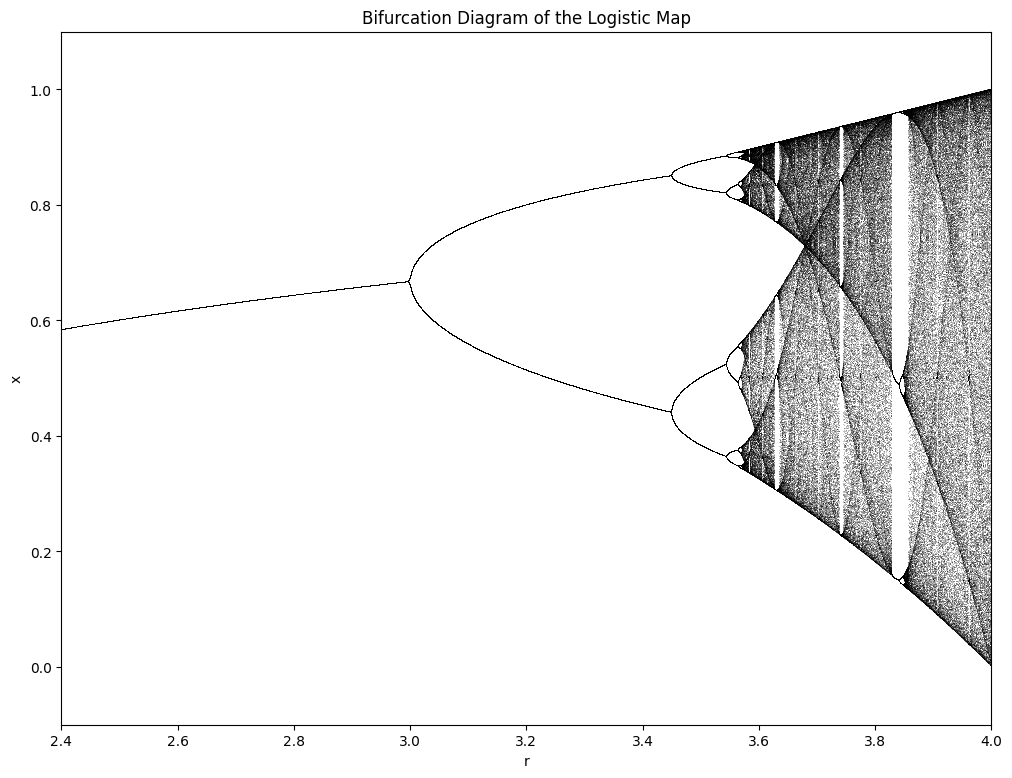

In [ ]:

# Initialize plot
fig, ax = plt.subplots(1, 1, figsize=(12, 9))
ax.set_title("Bifurcation Diagram of the Logistic Map")
ax.set_xlabel("r")
ax.set_ylabel("x")
ax.set_xlim(2.4, 4)
ax.set_ylim(-0.1, 1.1)

# Simulation parameters
r_values = np.linspace(2.4, 4, 10000)
iterations = 1000
last_iterations = 100  # Only plot the last iterations to visualize attractors

# Main loop for bifurcation plot
x = 1e-5 * np.ones(len(r_values))
for i in range(iterations):
    x = logistic(r_values, x)
    if i >= (iterations - last_iterations):
        ax.plot(r_values, x, ',k', alpha=0.25)

plt.show()